### This script contains the following points:

#### 1. Import Data.
#### 2. Security Implications.
#### 3. Create regional segmentation of the data.
###### 3.1. Use region onformation to create column.
###### 3.2. Determine wheter there's a differnce in spending habits between the different U.S.
#### 4. Create exclusin flag for low-activity customers.
###### 4.1 Export this sample.
#### 5. Create a profiling variable based on age, income, goods and number of dependents.
#### 6. Create visualization to show the distribution of profiles.
#### 7. Aggrega max, mean and min variables on a customer-profile level for usage frequency and expenditure.
#### 8. Compare your customer profiles with regions and departments. 
#### 9. Produce suitable charts to illustrate results.
#### 10. Export final data set.

In [20]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 1. Import Data

In [145]:
#Import Data
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

# Importing products df
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,125935,1,3,13,NaN,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,130797,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,300,Organic Enriched Unbleached White Flour,17,13,3.7,2105642,168073,4,4,12,2.0,20,0,Low-range product,Low-range product,Least busy,Slowest Days,Most orders,25,Regular customer,Low spender,9.051505,5.0,Frequent customer,Lisa,Case,Female,North Carolina,44,2020-04-01,1,married,148828,both
206205,300,Organic Enriched Unbleached White Flour,17,13,3.7,2979863,49635,6,0,17,3.0,9,0,Low-range product,Low-range product,Busiest day,Busiest Days,Average orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Jeremy,Robbins,Male,Hawaii,62,2020-04-01,3,married,168639,both
206206,300,Organic Enriched Unbleached White Flour,17,13,3.7,1258582,135902,14,1,10,5.0,3,1,Low-range product,Low-range product,Regularly busy,Busiest Days,Most orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,both
206207,300,Organic Enriched Unbleached White Flour,17,13,3.7,1093020,81095,11,1,9,24.0,11,0,Low-range product,Low-range product,Regularly busy,Busiest Days,Average orders,11,Regular customer,Low spender,8.302778,18.0,Regular customer,Rose,Rollins,Female,California,27,2020-04-01,1,married,99799,both


In [146]:
df_final.shape

(206209, 34)

In [147]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', 'price_range', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_flag', 'avg_price_purchases', 'median_days_between_orders',
       'order_frequency', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       '_merge'],
      dtype='object')

In [148]:
df_final.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,max_order,avg_price_purchases,median_days_between_orders,age,date_joined,number_of_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000,2.062090e+05,206209.000000,206209.000000,206209.000000,193102.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209,206209.000000,206209.000000
mean,171.437600,65.386021,9.453375,7.515732,1.710804e+06,17.073629,2.763871,13.281869,11.230515,8.103705,0.583151,33.637412,12.071912,10.638430,49.501646,2018-08-17 03:06:30.029532928,1.499823,94632.852548
min,1.000000,1.000000,1.000000,1.000000,1.300000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.500000,0.000000,18.000000,2017-01-01 00:00:00,0.000000,25903.000000
25%,100.000000,24.000000,4.000000,2.700000,8.570710e+05,5.000000,1.000000,10.000000,5.000000,3.000000,0.000000,13.000000,7.261883,6.000000,33.000000,2017-10-23 00:00:00,0.000000,59874.000000
50%,196.000000,77.000000,7.000000,9.000000,1.713998e+06,11.000000,3.000000,13.000000,8.000000,6.000000,1.000000,27.000000,7.759214,8.000000,49.000000,2018-08-16 00:00:00,1.000000,93547.000000
75%,258.000000,83.000000,16.000000,10.800000,2.564761e+06,23.000000,5.000000,16.000000,15.000000,11.000000,1.000000,48.000000,8.213143,14.000000,66.000000,2019-06-10 00:00:00,3.000000,124244.000000
max,300.000000,134.000000,21.000000,24.300000,3.421066e+06,99.000000,6.000000,23.000000,30.000000,99.000000,1.000000,99.000000,10721.342857,30.000000,81.000000,2020-04-01 00:00:00,3.000000,593901.000000
std,83.376504,34.776700,6.133741,4.546413,9.868364e+05,17.574376,2.034381,4.203593,8.856856,7.249241,0.493039,25.623060,83.661505,7.350162,18.480962,NaN,1.118433,42473.786988


In [149]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   product_id                  206209 non-null  int64         
 1   product_name                206209 non-null  object        
 2   aisle_id                    206209 non-null  int64         
 3   department_id               206209 non-null  int64         
 4   prices                      206209 non-null  float64       
 5   order_id                    206209 non-null  int64         
 6   user_id                     206209 non-null  object        
 7   order_number                206209 non-null  int64         
 8   order_day_of_week           206209 non-null  int64         
 9   order_hour_of_day           206209 non-null  int64         
 10  days_since_last_order       193102 non-null  float64       
 11  add_to_cart_order           206209 non-

#### 2. Security Implications

In [150]:
# After researching the dataset, first_name and last_name columns are PII.
# Since they are not needed for the analysis, I will drop them before prociding.

In [151]:
df_final = df_final.drop(columns=['first_name', 'last_name'])

In [152]:
# I will also drop columns date_joined, aisle_id and _merge since they are not necessary for the analysis

In [153]:
df_final = df_final.drop(columns=['date_joined', 'aisle_id', '_merge'])

In [154]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  206209 non-null  int64  
 1   product_name                206209 non-null  object 
 2   department_id               206209 non-null  int64  
 3   prices                      206209 non-null  float64
 4   order_id                    206209 non-null  int64  
 5   user_id                     206209 non-null  object 
 6   order_number                206209 non-null  int64  
 7   order_day_of_week           206209 non-null  int64  
 8   order_hour_of_day           206209 non-null  int64  
 9   days_since_last_order       193102 non-null  float64
 10  add_to_cart_order           206209 non-null  int64  
 11  reordered                   206209 non-null  int64  
 12  price_range                 206209 non-null  object 
 13  price_range_lo

#### 3. Create regional segmentation of the data.

###### 3.1. Use region onformation to create column.

In [155]:
# A way to separate by region using the column 'state' would be West, Midwest, Pacific, South and Northeast.
# According to wikipedia, every region contains following states
# West: Alaska, Hawaii, Washington, Montana, Idaho, Wyoming, Oregon, California, Nevada, Utah, Colorado, Arizona and New Mexico
# Midwest: North Dakota, South Dakota, Nebraska, Kansas, Minessota, Iowa, Missouri, Wisconsin, Illinois, Indiana, Ohio, Minesota
# Northeast: Pennsylvania, New Jersey, New York, Rhode Island, Connecticut, Maine, Vermonth, Massachusets, New Hampshire
# South: Maryland, Delaware, Virginia, West Virginia, Kentucky, Tennessee, North Carolina, South Carolina, Mississippi, 
#        Alabama, Georgia, Florida, Louisiana, Arkansas, Oklahoma, Texas and DC m


df_final.loc[df_final['state'].isin(["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", 
                                     "Alaska", "Washington", "Oregon", "California", "Hawaii"]), 'region'] = "West"

df_final.loc[df_final['state'].isin(["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", 
                                     "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]), 'region'] = "Midwest"

df_final.loc[df_final['state'].isin(["Maine","New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", 
                                     "New York", "Pennsylvania", "New Jersey"]), 'region'] = "Northeast"

df_final.loc[df_final['state'].isin(["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "Mississippi",
                                     "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Texas",
                                     "Alabama", "Oklahoma", "Arkansas", "Louisiana"]), 'region'] = "South"

In [157]:
df_final['region'].isnull().sum()

0

###### 3.2. Determine wheter there's a differnce in spending habits between the different U.S.

In [158]:
df_final['region'].value_counts(dropna = False)

region
South        68737
West         52565
Midwest      48519
Northeast    36388
Name: count, dtype: int64

In [159]:
pd.set_option('display.max_columns', None)
df_final.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,gender,state,age,number_of_dependants,family_status,income,region
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,Missouri,48,3,married,165665,Midwest
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,New Mexico,36,0,single,59285,West
2,1,Chocolate Sandwich Cookies,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Male,Idaho,35,2,married,99568,West
3,1,Chocolate Sandwich Cookies,19,5.8,652770,125935,1,3,13,NaN,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Female,Iowa,40,0,single,42049,Midwest
4,1,Chocolate Sandwich Cookies,19,5.8,1813452,130797,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Female,Maryland,26,1,married,40374,South


In [160]:
# Let's check spending_flag by region
spenders = df_final.groupby(['region','spending_flag'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


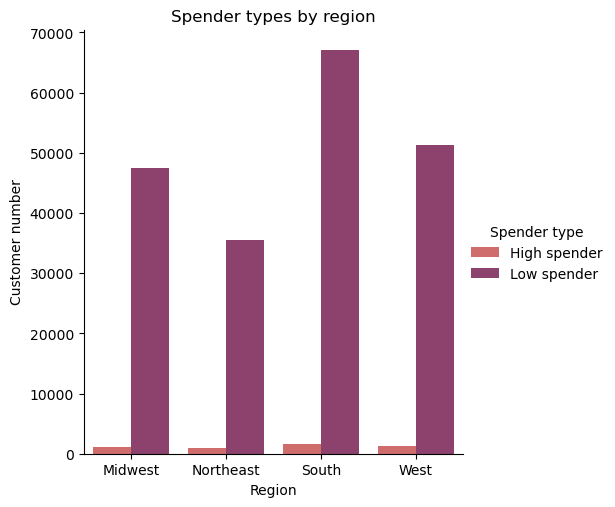

In [112]:
barchart_region_vs_spendertype = sns.catplot(data=spenders, kind="bar", x="region", y="user_id", 
                                             hue="spending_flag", palette="flare")
plt.title("Spender types by region")
barchart_region_vs_spendertype.set_axis_labels("Region", "Customer number")
barchart_region_vs_spendertype.legend.set_title("Spender type")

In [113]:
barchart_region_vs_spendertype.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_region_vs_spendertype.png'))

In [114]:
# Let's check loyalty_flag by region

In [161]:
loyalty = df_final.groupby(['region','loyalty_flag'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


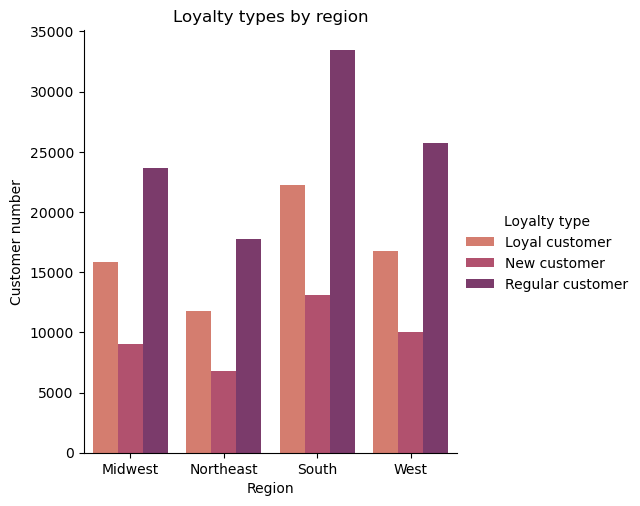

In [116]:
barchart_region_vs_loyaltytype = sns.catplot(data=loyalty, kind="bar", x="region", y="user_id", 
                                             hue="loyalty_flag", palette="flare")
plt.title("Loyalty types by region")
barchart_region_vs_loyaltytype.set_axis_labels("Region", "Customer number")
barchart_region_vs_loyaltytype.legend.set_title("Loyalty type")

In [117]:
barchart_region_vs_loyaltytype.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_region_vs_spendertype.png'))

In [118]:
# Let's check order_frequency by region

In [162]:
frequency = df_final.groupby(['region','order_frequency'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


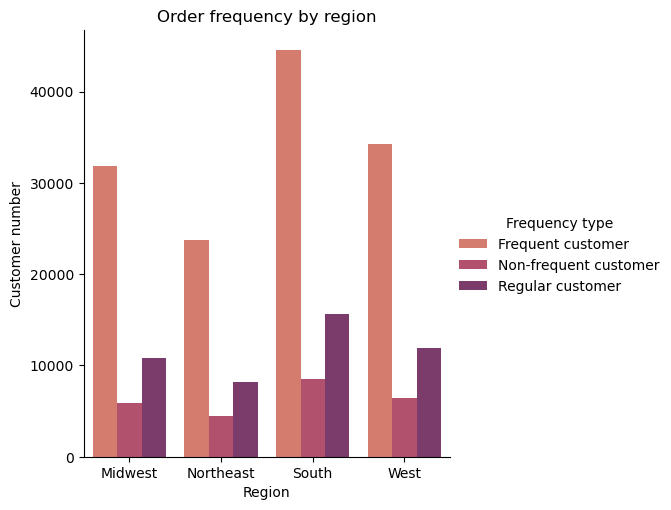

In [120]:
barchart_region_vs_frequencytype = sns.catplot(data=frequency, kind="bar", x="region", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by region")
barchart_region_vs_frequencytype.set_axis_labels("Region", "Customer number")
barchart_region_vs_frequencytype.legend.set_title("Frequency type")

In [121]:
barchart_region_vs_frequencytype.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_region_vs_spendertype.png'))

In [163]:
# As we can see in the previous bar charts, the region with more customers is the South, followed by West and Miswest, 
# and lastly Northeast.
# Low spenders are similar in the 4 regions, the number is low for all
#
# As far as loyalty goes, the South has the most regular and loyal customers, followed by West and Midwest, and lastly Northeast. 
#
# If we check for frequency in customers, same patterns repeat by region, South comes on first place, followed in orther by
# West, Midwest and Northeast.

#### 4. Create exclusin flag for low-activity customers.

In [164]:
df_final.loc[(df_final['max_order'] < 5), 'activity_type'] = "Low activity"
df_final.loc[(df_final['max_order'] >= 5), 'activity_type'] = "High activity"

In [165]:
df_final['activity_type'].value_counts(dropna=False)

activity_type
High activity    197228
Low activity       8981
Name: count, dtype: int64

###### 4.1 Export this sample.

In [166]:
df_final_high_activity = df_final.loc[(df_final['activity_type'] == "High activity")]
# Export data to pkl
df_final_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_high_activity.pkl'))

In [167]:
df_final_high_activity.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,gender,state,age,number_of_dependants,family_status,income,region,activity_type
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,Missouri,48,3,married,165665,Midwest,High activity
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,New Mexico,36,0,single,59285,West,High activity
2,1,Chocolate Sandwich Cookies,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Male,Idaho,35,2,married,99568,West,High activity
5,1,Chocolate Sandwich Cookies,19,5.8,1701441,133128,16,1,7,26.0,7,0,Mid-range product,Mid-range product,Regularly busy,Busiest Days,Average orders,26,Regular customer,Low spender,6.935398,11.0,Regular customer,Female,Kentucky,43,2,married,49643,South,High activity
6,1,Chocolate Sandwich Cookies,19,5.8,1871483,152052,3,2,14,30.0,2,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,9,New customer,Low spender,5.957576,20.0,Regular customer,Male,Montana,20,0,single,61746,West,High activity


#### 5. Create a profiling variable based on age, income, goods and number of dependents.

In [168]:
# Profiling based on age and income
df_final.loc[(df_final['age'] >= 18) & (df_final['age'] < 35)
             & (df_final['income'] < 50000), 'age_income_profile'] = 'low-income young-adult'
df_final.loc[(df_final['age'] >= 35) & (df_final['age'] < 65)
             & (df_final['income'] < 50000), 'age_income_profile'] = 'low-income adult'
df_final.loc[(df_final['age'] >= 65)
             & (df_final['income'] < 50000), 'age_income_profile'] = 'low-income senior'

df_final.loc[(df_final['age'] >= 18) & (df_final['age'] < 35)
             & (df_final['income'] >= 50000) & (df_final['income'] < 150000), 'age_income_profile'] = 'mid-income young-adult'
df_final.loc[(df_final['age'] >= 35) & (df_final['age'] < 65)
             & (df_final['income'] >= 50000) & (df_final['income'] < 150000), 'age_income_profile'] = 'mid-income adult'
df_final.loc[(df_final['age'] >= 65)
             & (df_final['income'] >= 50000) & (df_final['income'] < 150000), 'age_income_profile'] = 'mid-income senior'


df_final.loc[(df_final['age'] >= 18) & (df_final['age'] < 35)
             & (df_final['income'] > 150000), 'age_income_profile'] = 'high-income young-adult'
df_final.loc[(df_final['age'] >= 35) & (df_final['age'] < 65)
             & (df_final['income'] > 150000), 'age_income_profile'] = 'high-income adult'
df_final.loc[(df_final['age'] >= 65)
             & (df_final['income'] > 150000), 'age_income_profile'] = 'high-income senior'

In [172]:
df_final.head(10)

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,gender,state,age,number_of_dependants,family_status,income,region,activity_type,age_income_profile
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,Missouri,48,3,married,165665,Midwest,High activity,high-income adult
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,New Mexico,36,0,single,59285,West,High activity,mid-income adult
2,1,Chocolate Sandwich Cookies,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Male,Idaho,35,2,married,99568,West,High activity,mid-income adult
3,1,Chocolate Sandwich Cookies,19,5.8,652770,125935,1,3,13,NaN,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Female,Iowa,40,0,single,42049,Midwest,Low activity,low-income adult
4,1,Chocolate Sandwich Cookies,19,5.8,1813452,130797,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Female,Maryland,26,1,married,40374,South,Low activity,low-income young-adult
5,1,Chocolate Sandwich Cookies,19,5.8,1701441,133128,16,1,7,26.0,7,0,Mid-range product,Mid-range product,Regularly busy,Busiest Days,Average orders,26,Regular customer,Low spender,6.935398,11.0,Regular customer,Female,Kentucky,43,2,married,49643,South,High activity,low-income adult
6,1,Chocolate Sandwich Cookies,19,5.8,1871483,152052,3,2,14,30.0,2,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,9,New customer,Low spender,5.957576,20.0,Regular customer,Male,Montana,20,0,single,61746,West,High activity,mid-income young-adult
7,1,Chocolate Sandwich Cookies,19,5.8,1290456,168851,12,3,10,30.0,1,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,12,Regular customer,Low spender,6.680000,6.0,Frequent customer,Male,South Carolina,30,0,single,63712,South,High activity,mid-income young-adult
8,1,Chocolate Sandwich Cookies,19,5.8,369558,69965,10,1,20,19.0,1,0,Mid-range product,Mid-range product,Regularly busy,Busiest Days,Average orders,20,Regular customer,Low spender,7.162500,10.0,Frequent customer,Male,Texas,47,1,married,162432,South,High activity,high-income adult
9,1,Chocolate Sandwich Cookies,19,5.8,589712,82820,15,1,12,15.0,2,1,Mid-range product,Mid-range product,Regularly busy,Busiest Days,Most orders,20,Regular customer,Low spender,7.162500,10.0,Frequent customer,Male,Virginia,26,2,married,32072,South,High activity,low-income young-adult


In [174]:
df_final['age_income_profile'].isnull().sum()

0

In [175]:
# Profiling based on family status vs age_income_profile

In [176]:
df_final['family_status'].value_counts()

family_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

In [177]:
df_final_age_income_vs_family = pd.crosstab(df_final['age_income_profile'], df_final['family_status'], dropna = False)
df_final_age_income_vs_family

family_status,divorced/widowed,living with parents and siblings,married,single
age_income_profile,,,,
high-income adult,677,0,10103,2708
high-income senior,2373,0,7089,0
high-income young-adult,0,49,180,72
low-income adult,538,0,10978,3138
low-income senior,1798,0,5432,0
low-income young-adult,0,2133,6992,3096
mid-income adult,2767,0,51409,14319
mid-income senior,9487,0,28550,0
mid-income young-adult,0,7519,24171,10628


In [178]:
# Profiling based on number of dependents vs age_income_profile

In [179]:
df_final_age_income_vs_dependents = pd.crosstab(df_final['age_income_profile'], df_final['number_of_dependants'], dropna = False)
df_final_age_income_vs_dependents

number_of_dependants,0,1,2,3
age_income_profile,,,,
high-income adult,3385,3414,3294,3395
high-income senior,2373,2319,2380,2390
high-income young-adult,72,64,84,81
low-income adult,3676,3676,3617,3685
low-income senior,1798,1838,1793,1801
low-income young-adult,3096,2997,3111,3017
mid-income adult,17086,17227,16978,17204
mid-income senior,9487,9517,9578,9455
mid-income young-adult,10628,10477,10647,10566


In [ ]:
# Profiling based on orders_day_of_week vs age_income_profile

In [180]:
df_final_age_income_vs_order_day = pd.crosstab(df_final['age_income_profile'], df_final['order_day_of_week'], dropna = False)
df_final_age_income_vs_order_day

order_day_of_week,0,1,2,3,4,5,6
age_income_profile,,,,,,,
high-income adult,2218,2526,1813,1646,1788,1841,1656
high-income senior,1600,1686,1313,1214,1177,1330,1142
high-income young-adult,46,52,45,35,47,40,36
low-income adult,2466,2651,2002,1804,1733,2054,1944
low-income senior,1183,1285,996,951,927,1047,841
low-income young-adult,2099,2228,1690,1499,1591,1591,1523
mid-income adult,11668,12541,9276,8480,8498,9307,8725
mid-income senior,6377,7004,5161,4782,4735,5211,4767
mid-income young-adult,7331,7718,5731,5296,5294,5695,5253


In [ ]:
# Profiling based on order_hour_of_day vs age_income_profile

In [181]:
df_final_age_income_vs_order_hour = pd.crosstab(df_final['age_income_profile'], df_final['order_hour_of_day'], dropna = False)
df_final_age_income_vs_order_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
age_income_profile,,,,,,,,,,,,,,,,,,,,,,,,
high-income adult,79,46,22,31,15,35,113,365,739,1115,1253,1189,1150,1096,1136,1044,986,854,636,476,387,296,254,171
high-income senior,69,28,17,20,12,27,72,254,509,758,873,851,748,799,807,755,797,542,428,319,259,214,187,117
high-income young-adult,0,1,0,0,0,0,1,12,13,27,28,27,30,22,27,17,18,21,14,15,8,8,3,9
low-income adult,80,56,32,20,23,35,125,395,812,1152,1308,1328,1145,1190,1305,1133,1167,870,698,534,405,375,285,181
low-income senior,58,20,13,5,12,15,50,199,372,596,687,634,589,595,623,570,498,475,361,252,208,184,135,79
low-income young-adult,80,44,22,14,23,36,134,313,648,958,1105,1083,1026,1022,943,1059,939,786,600,403,316,299,209,159
mid-income adult,440,253,156,105,116,199,580,1783,3766,5716,6203,6018,5577,5672,5611,5643,5187,4181,3113,2444,2064,1558,1255,855
mid-income senior,233,124,76,49,59,116,360,1076,2099,3179,3375,3405,3045,3279,3160,3058,2782,2302,1729,1342,1083,934,704,468
mid-income young-adult,249,150,93,63,72,122,393,1174,2287,3446,3894,3762,3482,3529,3564,3479,3126,2610,1910,1442,1151,949,848,523


In [ ]:
# Profiling based on department_id

In [182]:
df_final['department_id'].value_counts()

department_id
4     48829
7     44689
19    23824
1     18478
16    12638
9     10479
17     9158
15     7268
13     6761
20     6695
6      3673
18     3154
14     2566
11     2323
12     2071
8      1772
3      1188
5       427
2       130
21       86
Name: count, dtype: int64

#### 6. Create visualization to show the distribution of profiles.

In [ ]:
frequency = df_final.groupby(['region','order_frequency'], as_index=False).agg({'user_id': 'nunique'})

In [ ]:
barchart_region_vs_frequencytype = sns.catplot(data=frequency, kind="bar", x="region", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by region")
barchart_region_vs_frequencytype.set_axis_labels("Region", "Customer number")
barchart_region_vs_frequencytype.legend.set_title("Frequency type")

In [ ]:
# Profiling based on age and income

In [183]:
age_income_orders = df_final.groupby(['age_income_profile','order_frequency'], as_index=False).agg({'user_id': 'nunique'})

Text(0.5, 0, '')

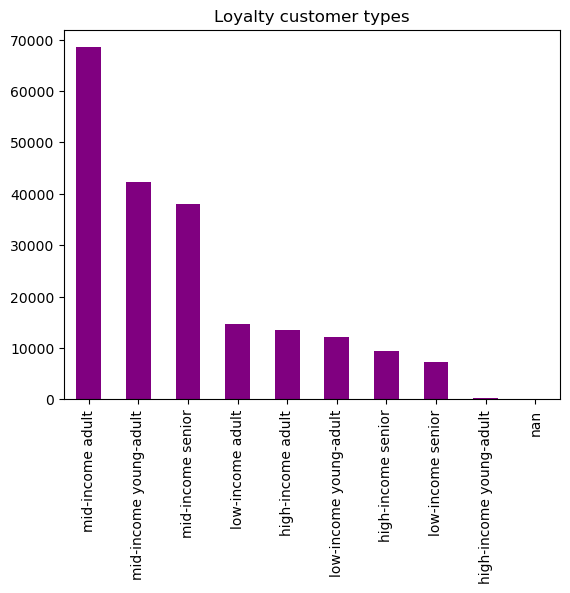

In [190]:
barchart_age_income_orders = df_final['age_income_profile'].value_counts().plot.bar(color='purple')
plt.title('Age and Income profile')
plt.ylabel('')
plt.xlabel('')

In [219]:
barchart_age_income_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_age_income_orders.png'))

In [ ]:
# Profiling based on family status

Text(0.5, 0, '')

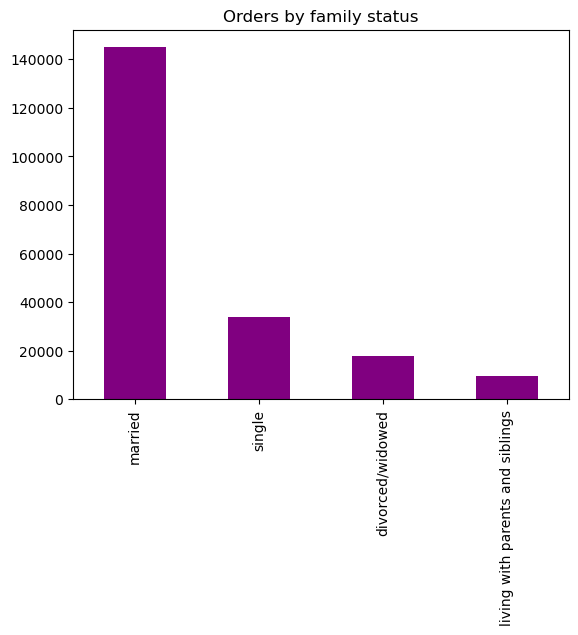

In [239]:
barchart_family_status_orders = df_final['family_status'].value_counts().plot.bar(color='purple')
plt.title('Orders by family status')
plt.ylabel('')
plt.xlabel('')

In [238]:
barchart_family_status_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_family_status_orders.png'))

In [ ]:
# Profiling based on department

In [199]:
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col = 0)
df_departments.index.names = ['department_id']
df_departments.reset_index()
df_departments

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [200]:
df_final_with_departments = df_final.merge(df_departments, on='department_id', how='left', indicator=True)
df_final_with_departments

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,gender,state,age,number_of_dependants,family_status,income,region,activity_type,age_income_profile,department,_merge
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,Missouri,48,3,married,165665,Midwest,High activity,high-income adult,snacks,both
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Female,New Mexico,36,0,single,59285,West,High activity,mid-income adult,snacks,both
2,1,Chocolate Sandwich Cookies,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Male,Idaho,35,2,married,99568,West,High activity,mid-income adult,snacks,both
3,1,Chocolate Sandwich Cookies,19,5.8,652770,125935,1,3,13,NaN,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Female,Iowa,40,0,single,42049,Midwest,Low activity,low-income adult,snacks,both
4,1,Chocolate Sandwich Cookies,19,5.8,1813452,130797,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Female,Maryland,26,1,married,40374,South,Low activity,low-income young-adult,snacks,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,300,Organic Enriched Unbleached White Flour,13,3.7,2105642,168073,4,4,12,2.0,20,0,Low-range product,Low-range product,Least busy,Slowest Days,Most orders,25,Regular customer,Low spender,9.051505,5.0,Frequent customer,Female,North Carolina,44,1,married,148828,South,High activity,mid-income adult,pantry,both
206205,300,Organic Enriched Unbleached White Flour,13,3.7,2979863,49635,6,0,17,3.0,9,0,Low-range product,Low-range product,Busiest day,Busiest Days,Average orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Male,Hawaii,62,3,married,168639,West,High activity,high-income adult,pantry,both
206206,300,Organic Enriched Unbleached White Flour,13,3.7,1258582,135902,14,1,10,5.0,3,1,Low-range product,Low-range product,Regularly busy,Busiest Days,Most orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Female,Missouri,66,2,married,53374,Midwest,High activity,mid-income senior,pantry,both
206207,300,Organic Enriched Unbleached White Flour,13,3.7,1093020,81095,11,1,9,24.0,11,0,Low-range product,Low-range product,Regularly busy,Busiest Days,Average orders,11,Regular customer,Low spender,8.302778,18.0,Regular customer,Female,California,27,1,married,99799,West,High activity,mid-income young-adult,pantry,both


In [206]:
df_department_barchart = df_final_with_departments.groupby(['department'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


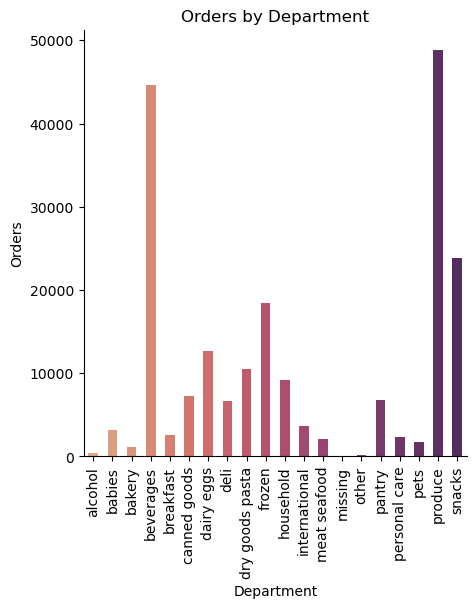

In [215]:
barchart_department_orders = sns.catplot(data=df_department_barchart, kind="bar", x="department", y="order_id", 
                                         palette="flare", width = 0.5)
plt.title("Orders by Department")
barchart_department_orders.set_axis_labels("Department", "Orders")
barchart_department_orders.tick_params(axis='x', rotation=90)

In [220]:
barchart_department_orders.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_department_orders.png'))

In [ ]:
# Profiling based on order_hour_of_day

In [231]:
df_days_linechart = df_final.groupby(['order_hour_of_day'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x154d77ccc10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

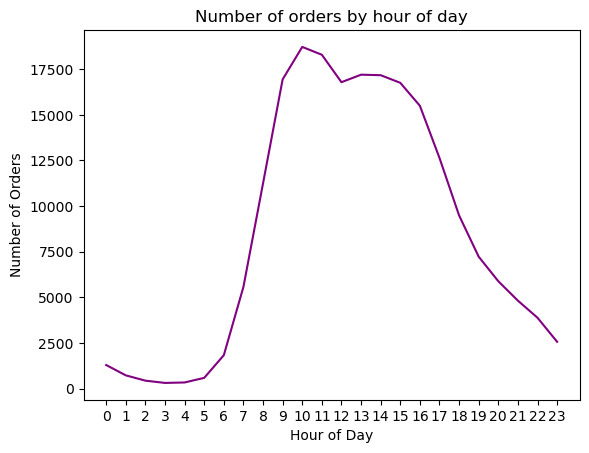

In [232]:
linechart_hours = sns.lineplot(data = df_days_linechart, x = 'order_hour_of_day', y = 'order_id', color = 'purple')
plt.title('Number of orders by hour of day')
plt.ylabel('Number of Orders')
plt.xlabel('Hour of Day')
plt.xticks(np.arange(0,24,1))

In [223]:
linechart_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_days.png'))

In [ ]:
# Profiling based on orders_day_of_week

In [233]:
df_days_linechart = df_final.groupby(['order_day_of_week'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Day of week')

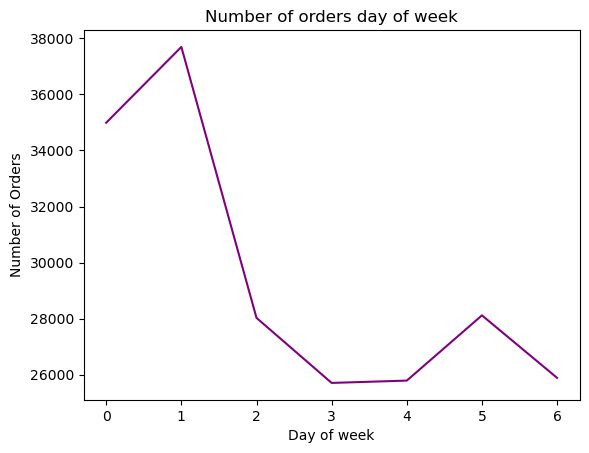

In [234]:
linechart_days = sns.lineplot(data = df_days_linechart,x = 'order_day_of_week', y = 'order_id', color = 'purple')
plt.title('Number of orders day of week')
plt.ylabel('Number of Orders')
plt.xlabel('Day of week')

In [235]:
linechart_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_days.png'))

#### 7. Aggrega max, mean and min variables on a customer-profile level for usage frequency and expenditure.

In [242]:
# Statistics by expenditure
df_final.groupby('age_income_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                             mean  min   max
age_income_profile                          
high-income adult        7.469365  1.1  24.3
high-income senior       7.521528  1.1  24.3
high-income young-adult  7.606312  1.2  18.9
low-income adult         7.436113  1.0  24.3
low-income senior        7.530636  1.0  24.3
low-income young-adult   7.537624  1.0  24.3
mid-income adult         7.519568  1.0  24.3
mid-income senior        7.550666  1.0  24.3
mid-income young-adult   7.509937  1.1  24.3
nan                      3.666667  1.4   7.1

In [243]:
# Statistics by usage
df_final.groupby('age_income_profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                              mean min max
age_income_profile                        
high-income adult        33.445062   3  99
high-income senior       33.532340   3  99
high-income young-adult  32.744186   3  99
low-income adult         33.510577   3  99
low-income senior        33.509405   3  99
low-income young-adult   33.579494   3  99
mid-income adult         33.700606   3  99
mid-income senior        33.907012   3  99
mid-income young-adult   33.467177   3  99
nan                      23.666667  17  30

#### 8. Compare your customer profiles with regions and departments. 

In [ ]:
# Age_income_profile by region

In [275]:
west_customers = df_final_with_departments[df_final['region'] == 'West']
midwest_customers = df_final_with_departments[df_final['region'] == 'Midwest']
northeast_customers = df_final_with_departments[df_final['region'] == 'Northeast']
south_customers = df_final_with_departments[df_final['region'] == 'South']

In [ ]:
# West region

In [256]:
df_age_income_west = west_customers.groupby(['age_income_profile'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


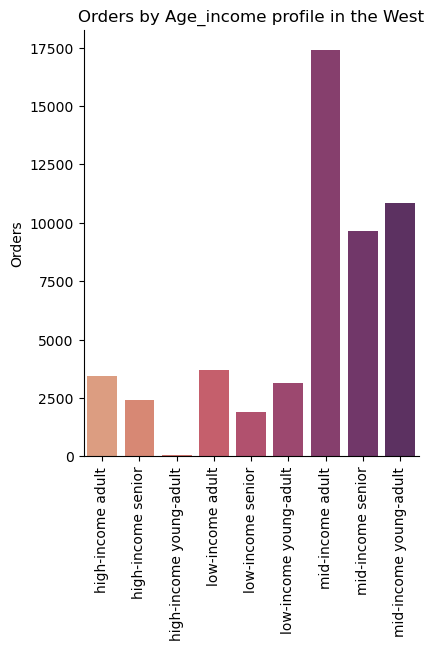

In [259]:
barchart_age_income_region_west = sns.catplot(data=df_age_income_west, kind="bar", x="age_income_profile", y="order_id", palette="flare")
plt.title("Orders by Age_income profile in the West")
barchart_age_income_region_west.set_axis_labels("", "Orders")
barchart_age_income_region_west.tick_params(axis='x', rotation=90)

In [260]:
barchart_age_income_region_west.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_age_income_region_west.png'))

In [ ]:
# Midwest region

In [261]:
df_age_income_midwest = midwest_customers.groupby(['age_income_profile'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


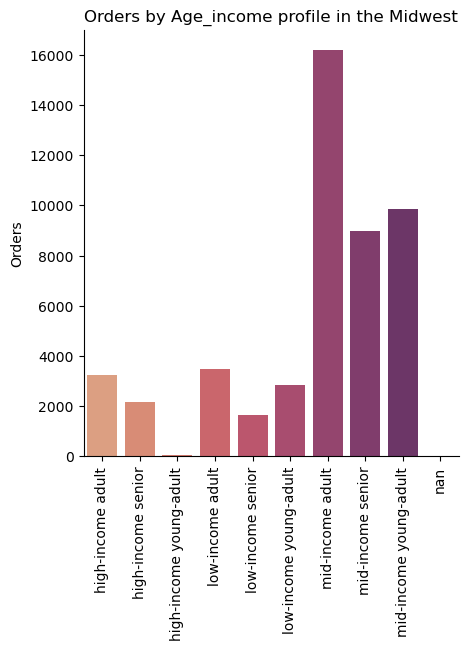

In [262]:
barchart_age_income_region_midwest = sns.catplot(data=df_age_income_midwest, kind="bar", x="age_income_profile", y="order_id", palette="flare")
plt.title("Orders by Age_income profile in the Midwest")
barchart_age_income_region_midwest.set_axis_labels("", "Orders")
barchart_age_income_region_midwest.tick_params(axis='x', rotation=90)

In [263]:
barchart_age_income_region_midwest.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_age_income_region_midwest.png'))

In [ ]:
# Northeast region

In [264]:
df_age_income_northeast = northeast_customers.groupby(['age_income_profile'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


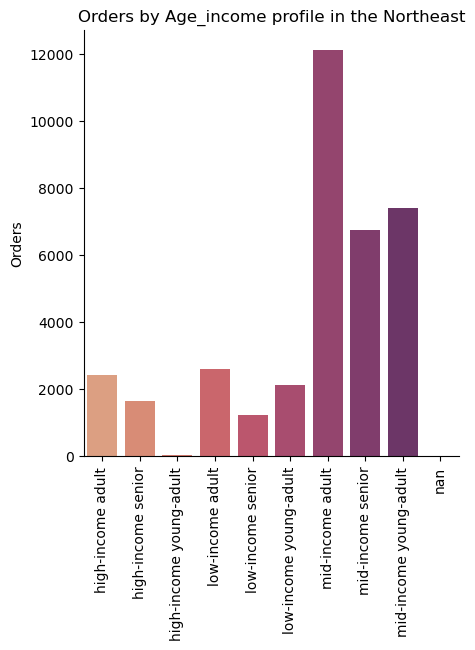

In [265]:
barchart_age_income_region_northeast = sns.catplot(data=df_age_income_northeast, kind="bar", x="age_income_profile", y="order_id", palette="flare")
plt.title("Orders by Age_income profile in the Northeast")
barchart_age_income_region_northeast.set_axis_labels("", "Orders")
barchart_age_income_region_northeast.tick_params(axis='x', rotation=90)

In [266]:
barchart_age_income_region_northeast.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_age_income_region_northeast.png'))

In [ ]:
# South region

In [267]:
df_age_income_south = south_customers.groupby(['age_income_profile'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


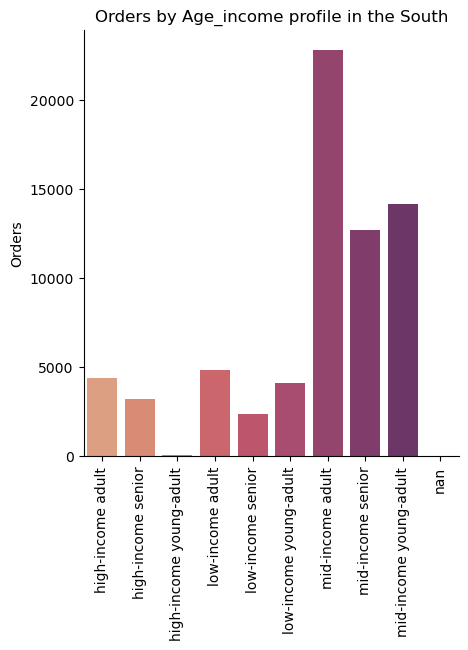

In [270]:
barchart_age_income_region_south = sns.catplot(data=df_age_income_south, kind="bar", x="age_income_profile", y="order_id", palette="flare")
plt.title("Orders by Age_income profile in the South")
barchart_age_income_region_south.set_axis_labels("", "Orders")
barchart_age_income_region_south.tick_params(axis='x', rotation=90)

In [271]:
barchart_age_income_region_south.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_age_income_region_south.png'))

In [ ]:
# Age_income_profile vs department

In [ ]:
# West region

In [276]:
df_department_west = west_customers.groupby(['department'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


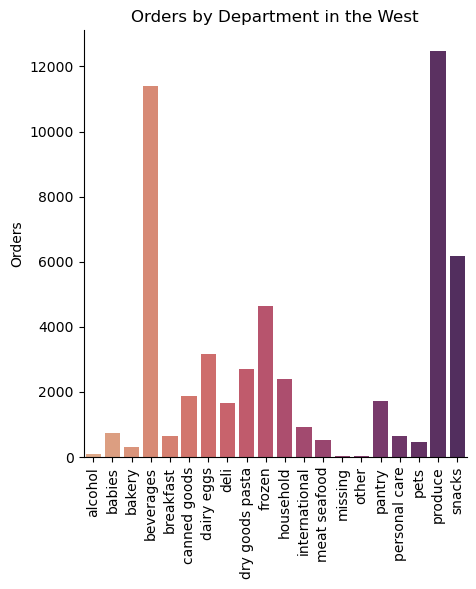

In [279]:
barchart_department_west = sns.catplot(data=df_department_west, kind="bar", x="department", y="order_id", palette="flare")
plt.title("Orders by Department in the West")
barchart_department_west.set_axis_labels("", "Orders")
barchart_department_west.tick_params(axis='x', rotation=90)

In [280]:
barchart_department_west.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_department_west.png'))

In [ ]:
# Midwest region

In [281]:
df_department_midwest = midwest_customers.groupby(['department'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


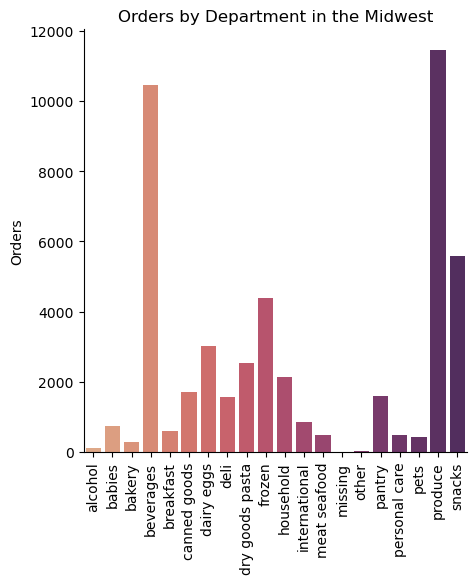

In [282]:
barchart_department_midwest = sns.catplot(data=df_department_midwest, kind="bar", x="department", y="order_id", palette="flare")
plt.title("Orders by Department in the Midwest")
barchart_department_midwest.set_axis_labels("", "Orders")
barchart_department_midwest.tick_params(axis='x', rotation=90)

In [283]:
barchart_department_midwest.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_department_midwest.png'))

In [284]:
# Northeast region

In [285]:
df_department_northeast = northeast_customers.groupby(['department'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


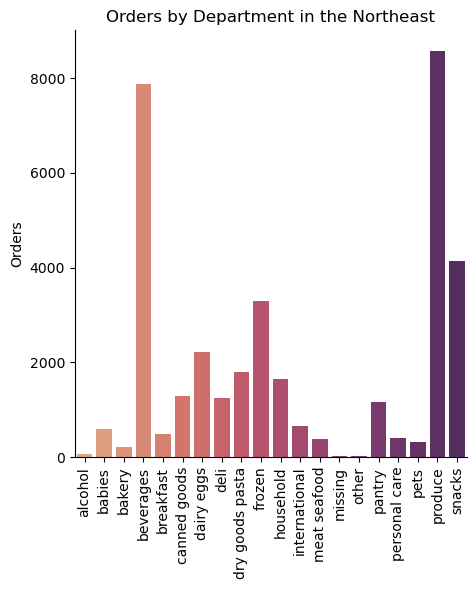

In [286]:
barchart_department_northeast = sns.catplot(data=df_department_northeast, kind="bar", x="department", y="order_id", palette="flare")
plt.title("Orders by Department in the Northeast")
barchart_department_northeast.set_axis_labels("", "Orders")
barchart_department_northeast.tick_params(axis='x', rotation=90)

In [287]:
barchart_department_northeast.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_department_northeast.png'))

In [ ]:
# South region

In [288]:
df_department_south = south_customers.groupby(['department'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


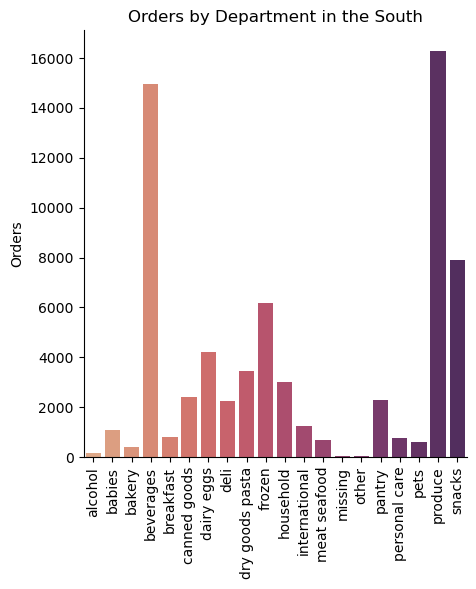

In [289]:
barchart_department_south = sns.catplot(data=df_department_south, kind="bar", x="department", y="order_id", palette="flare")
plt.title("Orders by Department in the South")
barchart_department_south.set_axis_labels("", "Orders")
barchart_department_south.tick_params(axis='x', rotation=90)

In [290]:
barchart_department_south.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_department_south.png'))

#### 9. Produce suitable charts to illustrate results.

In [ ]:
# this part of the exercise was done in script 4.10 Part 2

#### 10. Export final data set.

In [291]:
# Export data to pkl
df_final_with_departments.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_ex10.pkl'))